# Analizando día de la semana más peligroso.

    Muy similar al análisis que realizamos por horas, pero ahora viendo qué día de la semana es más peligroso.  

Partiremos de la combinación de la base de datos de delitos con la de las estaciones para empezar el proceso.

In [3]:
import numpy as np
import pandas as pd
import re

In [4]:
estaciones_por_crimen = pd.read_csv('sublime_775_000.csv')
delitos = pd.read_csv('delitos_limpio_v1.csv')
data = pd.concat([delitos.iloc[:775000], estaciones_por_crimen], axis=1) #junto ambas partes.
data = data.drop(columns=['Unnamed: 0', 'index', 'calle_hechos', 'longitud', 'latitud', 'geo_punto', 
                          'stop_lat', 'stop_lon', 'alcaldia_hechos'])
data.head(3) 

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,colonia_hechos,nombre_estacion,primera_estacion,segunda_estacion,tercera_estacion,cuarta_estacion
0,2018.0,Abril,2018-04-13 13:30:00,ROBO DE DOCUMENTOS,DELITO DE BAJO IMPACTO,POLANCO,Polanco,Metro 7,Ninguna,Ninguna,Ninguna
1,2016.0,Agosto,2016-08-05 16:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,PLAZA COAPA,Lomas Estrella,Metro 12,Ninguna,Ninguna,Ninguna
2,2015.0,Octubre,2015-10-23 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,DOCTORES,Niños Héroes_1,Metro 3,Ninguna,Ninguna,Ninguna


In [5]:
data = data.drop(columns=['año_hechos', 'mes_hechos'])

# Paso 1. Analizar los horarios más seguros por estación. 

    Para lograr esto primero necesito concentrarme únicamente en los delitos que entren en la categoría de "robo a pasajero a bordo del metro con y sin violencia". 

In [6]:
data = data[data.categoria_delito=='ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA']
data.shape 

(5406, 9)

Veamos si podemos añadir una columna donde se muestre únicamente la hora. 

In [12]:
data.fecha_hechos = pd.to_datetime(data.fecha_hechos)
data.head()

,fecha_hechos,delito,categoria_delito,colonia_hechos,nombre_estacion,primera_estacion,segunda_estacion,tercera_estacion,cuarta_estacion
42,2016-08-04 14:00:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CENTRO,Pino Suárez_1,Metro 2,Metro 1,Ninguna,Ninguna
205,2018-04-24 22:00:00,ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,TACUBA,Tacuba_1,Metro 2,Metro 7,Ninguna,Ninguna
210,2008-04-24 07:45:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,TACUBAYA,Tacubaya_1_3,Metro 9,Metro 1,Metro 7,Ninguna
243,2015-12-15 09:30:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CENTRO,Balderas_1_2,Metro 1,Metro 3,Ninguna,Ninguna
498,2018-01-20 16:00:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CENTRO,Zócalo,Metro 2,Ninguna,Ninguna,Ninguna


In [7]:
#las estaciones con violencia merecen una ponderación distinta
data.delito = data.delito.apply(lambda x: 1 if x== "ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA" else 2)

In [8]:
data.head(3)

,fecha_hechos,delito,categoria_delito,colonia_hechos,nombre_estacion,primera_estacion,segunda_estacion,tercera_estacion,cuarta_estacion
42,2016-08-04 14:00:00,1,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CENTRO,Pino Suárez_1,Metro 2,Metro 1,Ninguna,Ninguna
205,2018-04-24 22:00:00,2,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,TACUBA,Tacuba_1,Metro 2,Metro 7,Ninguna,Ninguna
210,2008-04-24 07:45:00,1,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,TACUBAYA,Tacubaya_1_3,Metro 9,Metro 1,Metro 7,Ninguna


In [12]:
data.nombre_estacion.value_counts()[:15]

Hidalgo_1_2          361
Pino Suárez_1_2      344
Zócalo               254
Pantitlán_1_3        201
Bellas Artes_1_2     195
Chabacano_1_2        166
Balderas_1_2         143
Hidalgo_1_3          139
Pino Suárez_1        138
Balderas_1           109
Centro Médico_1_2    101
Tacuba_1              91
Tacubaya_1_2          87
Tacubaya_1_3          87
Revolución_1          83
Name: nombre_estacion, dtype: int64

In [17]:
data = data.drop(columns=['index'])

In [18]:
data.head(2)

,fecha_hechos,delito,categoria_delito,colonia_hechos,nombre_estacion,primera_estacion,segunda_estacion,tercera_estacion,cuarta_estacion,año,mes,dia_num
0,2016-08-04 14:00:00,1,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CENTRO,Pino Suárez_1,Metro 2,Metro 1,Ninguna,Ninguna,2016,08,04
1,2018-04-24 22:00:00,2,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,TACUBA,Tacuba_1,Metro 2,Metro 7,Ninguna,Ninguna,2018,04,24


In [10]:
import datetime
datetime.datetime.today()
#datetime.datetime(2012, 3, 23, 23, 24, 55, 173504)
#datetime.datetime.today().weekday()

datetime.datetime(2019, 12, 13, 13, 38, 34, 349844)

In [13]:
#Cool. Esa librería nos da lo que necesitamos Ahora necesitamos solo obtener en una columna aparte el año,
#luego en otra poner el mes y luego el día, y finalmente en una cuarta columna poner el día 

data['año'] = data.fecha_hechos.apply(lambda x: str(x)[:4])
data['mes'] = data.fecha_hechos.apply(lambda x: str(x)[5:7])
data['dia_num'] = data.fecha_hechos.apply(lambda x: str(x)[8:10])

In [23]:
lista_dias = []
for i in range(len(data)):
    año = int(data.iloc[i,9])
    mes = int(data.iloc[i,10])
    dia = int(data.iloc[i,11])
    dia_semana_num = datetime.date(año, mes, dia).weekday()
    lista_dias.append(dia_semana_num)

In [25]:
lista_dias[:10] #0 es lunes y 6 es domingo. 

[3, 1, 3, 1, 5, 3, 5, 2, 3, 2]

El siguiente paso sería añadir esto a una nueva variable y luego aplicar el ya famoso map. 

In [26]:
data['dia_raw'] = lista_dias

In [29]:
dict_transalte_dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo',
}

In [30]:
data['dia_en_palabras'] = data.dia_raw.map(dict_transalte_dias)
data.dia_en_palabras

0       Jueves
1       Martes
2       Jueves
3       Martes
4       Sábado
         ...  
5401    Martes
5402     Lunes
5403    Jueves
5404    Sábado
5405    Jueves
Name: dia_en_palabras, Length: 5406, dtype: object

In [42]:
valores = pd.DataFrame(data.dia_en_palabras.value_counts())
valores = valores.reset_index()
valores = valores.rename(columns={'dia_en_palabras': 'Número de Delitos en el Metro', 'index': 'Día de la Semana'})
valores['x'] = [5, 4, 6, 3, 2, 1, 7]
valores = valores.sort_values(by=['x'])
valores.head(8)

,Día de la Semana,Número de Delitos en el Metro,x
5,Lunes,743,1
4,Martes,758,2
3,Miércoles,817,3
1,Jueves,893,4
0,Viernes,1047,5
2,Sábado,859,6
6,Domingo,289,7


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

''

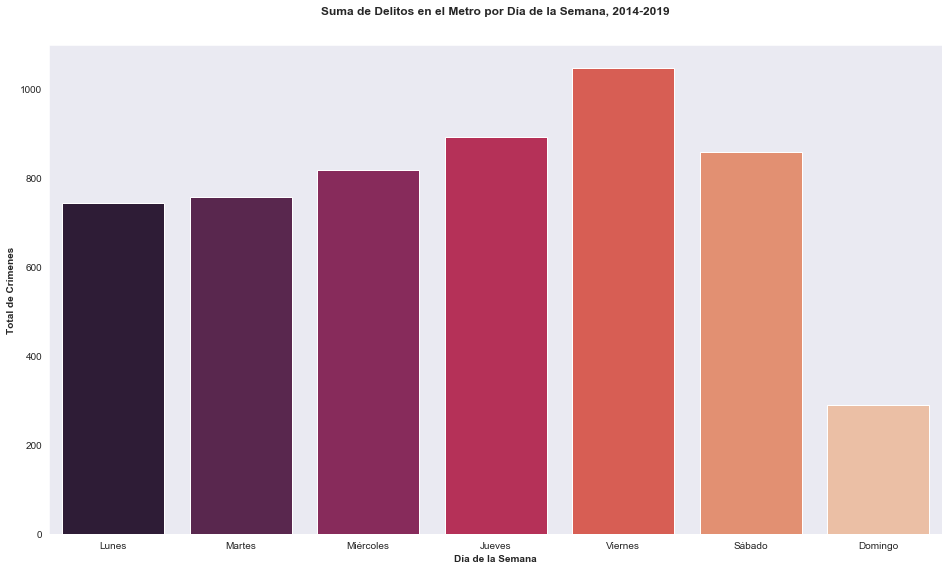

In [185]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)
sns.set_style("dark")
ax =sns.barplot(x='Día de la Semana', y='Número de Delitos en el Metro', data=valores, palette="rocket")
ax.set_title("Suma de Delitos en el Metro por Día de la Semana, 2014-2019", fontsize='large', 
             fontweight='bold', pad=30)
ax.set_ylabel("Total de Crímenes", fontsize='medium', 
              fontweight='bold')
ax.set_xlabel("Día de la Semana", fontsize='medium', 
              fontweight='bold')
ax.set_ylim([0, 1100])
plt.savefig('delitos_por_dia_de_la_semana_v7.png', dpi=400, bbox_inches='tight')
;

In [46]:
#De una vez obtengamos la gráfica para las horas del peligro
def get_hours(x):
    """Esta función es para extraer únicamente la hora de cada registro."""
    hour = x.hour
    return hour

In [49]:
data.fecha_hechos = pd.to_datetime(data.fecha_hechos)
data['hora_del_crimen'] = data.fecha_hechos.apply(get_hours)
df_horas = pd.DataFrame(data['hora_del_crimen'].value_counts())
df_horas = df_horas.reset_index()
df_horas.head()


,index,hora_del_crimen
0,8,609
1,19,509
2,18,461
3,15,428
4,7,422


In [52]:
df_horas = df_horas.sort_values(by='index')
df_horas = df_horas.iloc[5:,:]
df_horas.head()

,index,hora_del_crimen
18,5,45
14,6,160
4,7,422
0,8,609
6,9,351


''

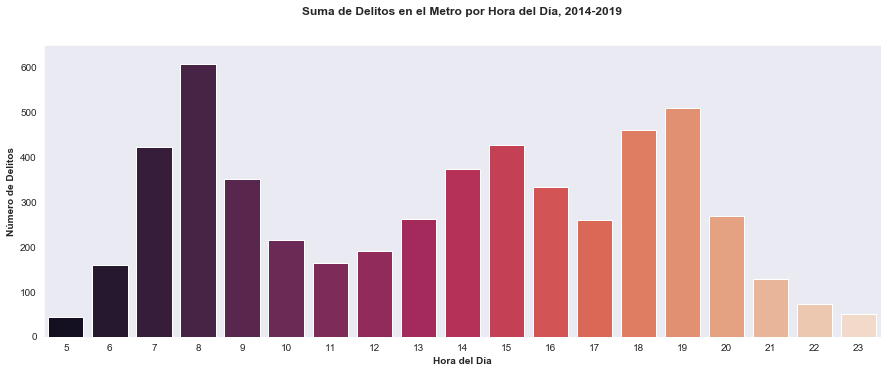

In [146]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
sns.set_style("dark")
ax =sns.barplot(x='index', y='hora_del_crimen', data=df_horas, palette="rocket")
fig.subplots_adjust(top=0.8)
ax.set_title("Suma de Delitos en el Metro por Hora del Día, 2014-2019", fontsize='large', 
             fontweight='bold', pad=30)
ax.set_ylabel("Número de Delitos", fontsize='medium', 
              fontweight='bold')
ax.set_xlabel("Hora del Día", fontsize='medium', fontweight='bold')
ax.set_ylim([0, 650])

plt.savefig('delitos_por_hora_del_dia_15_v15.png', dpi=400, bbox_inches='tight')
;

### Estas gráficas están muy lindas, pero es momento de volver a la tarea central. Voy a encontrar el día más peligroso para cada estación. 

In [155]:

data = data.drop(columns=['fecha_hechos', 'delito', 'categoria_delito',
                         'colonia_hechos', 'primera_estacion',
                         'segunda_estacion', 'tercera_estacion',
                         'cuarta_estacion', 'año'])
data.head()

,nombre_estacion,mes,dia_num,dia_raw,dia_en_palabras,hora_del_crimen
0,Pino Suárez_1,08,04,3,Jueves,14
1,Tacuba_1,04,24,1,Martes,22
2,Tacubaya_1_3,04,24,3,Jueves,7
3,Balderas_1_2,12,15,1,Martes,9
4,Zócalo,01,20,5,Sábado,16


In [156]:
data = data.drop(columns=['dia_num'])
data.head()

,nombre_estacion,mes,dia_raw,dia_en_palabras,hora_del_crimen
0,Pino Suárez_1,08,3,Jueves,14
1,Tacuba_1,04,1,Martes,22
2,Tacubaya_1_3,04,3,Jueves,7
3,Balderas_1_2,12,1,Martes,9
4,Zócalo,01,5,Sábado,16


In [157]:
data = data.drop(columns=['hora_del_crimen']) #ya no necesito eso por ahora
data.head()

,nombre_estacion,mes,dia_raw,dia_en_palabras
0,Pino Suárez_1,08,3,Jueves
1,Tacuba_1,04,1,Martes
2,Tacubaya_1_3,04,3,Jueves
3,Balderas_1_2,12,1,Martes
4,Zócalo,01,5,Sábado


In [158]:
data.shape

(5406, 4)

## Listo. La base de datos está en la forma más sencilla que podría estar. 

    Ahora aplicaré el método que me gusta emplear para encontrar la solución. Voy a elegir una estación concreta, 'Zócalo' de nuevo, y veré cuáles son los pasos para llegar a encontrar el día más peligroso. Después, por supuesto, voy a crear los bucles necesarios y tendré un nuevo DataFrame. 

In [159]:
wz = data[data.nombre_estacion == 'Zócalo']
wz.dia_en_palabras.value_counts()

Sábado       83
Viernes      44
Jueves       37
Miércoles    29
Domingo      28
Lunes        20
Martes       13
Name: dia_en_palabras, dtype: int64

In [176]:
wz = data[data.nombre_estacion == 'Zócalo']
wz.dia_en_palabras.value_counts().index[0] #PUM

'Sábado'

## Tiempo de iterar. 

In [162]:
lista_estaciones_180 = data.nombre_estacion.unique().tolist()
len(lista_estaciones_180)
#recordemos que van a faltar estas 15:
est_faltantes = ['Talismán_1_2', 'Valle Gómez', 'Impulsora', 'Los Reyes', 'Nezahualcóyotl', 'Múzquiz',
                  'Río de los Remedios_1', 'Olímpica', 'Consulado', 'Tecnológico', 'Aculco', 'La Paz',
                  'Zapotitlán', 'Ciudad Azteca', 'Plaza Aragón']

In [164]:
#Primero creamos el diccionario con las estaciones que sí están presentes
dict_dias_peligro = {}

for i in range(len(data)):
    dict_dias_peligro[data.iloc[i,0]] = data[data.nombre_estacion == data.iloc[i,0]].dia_en_palabras.value_counts().index[0]

In [166]:
len(dict_dias_peligro)

180

In [167]:
#ahora añadimos las 15 estaciones que faltan
for i in range(len(est_faltantes)):
    dict_dias_peligro[est_faltantes[i]] = "No Disponible"

In [168]:
len(dict_dias_peligro)

195

In [169]:
#ahora se lo añadimos a la colección actual. 
colec_actual = pd.read_csv('estaciones_colonias_v4_16_12.csv')
colec_actual = colec_actual.drop(columns=['Unnamed: 0'])
colec_actual.head()

,nombre_estacion,primera_linea,segunda_linea,tercera_linea,cuarta_linea,calif_estacion,ranking_estacion,colonia,calif_colonia,ranking_colonia,stop_lat,stop_lon,afluencia_promedio,place,id_estacion
0,Zapotitlán,Metro 12,Ninguna,Ninguna,Ninguna,100.0,1,La Draga,96.05,276,19.296390,-99.034023,6293,"{'type': 'Point', 'coordinates': [-99.03402328...",5df3cb9ed9e3d3ae2a1620a6
1,Tecnológico,Metro B,Ninguna,Ninguna,Ninguna,100.0,1,No Disponible,No Disponible,No Disponible,19.514705,-99.035686,28577,"{'type': 'Point', 'coordinates': [-99.03568625...",5df3cb9ed9e3d3ae2a1620a3
2,Olímpica,Metro B,Ninguna,Ninguna,Ninguna,100.0,1,No Disponible,No Disponible,No Disponible,19.520843,-99.032983,18907,"{'type': 'Point', 'coordinates': [-99.03298259...",5df3cb9ed9e3d3ae2a1620a1
3,Múzquiz,Metro B,Ninguna,Ninguna,Ninguna,100.0,1,No Disponible,No Disponible,No Disponible,19.500961,-99.041716,33639,"{'type': 'Point', 'coordinates': [-99.04171586...",5df3cb9ed9e3d3ae2a16209f
4,Ciudad Azteca,Metro B,Ninguna,Ninguna,Ninguna,100.0,1,No Disponible,No Disponible,No Disponible,19.534443,-99.027114,60232,"{'type': 'Point', 'coordinates': [-99.02711391...",5df3cb9ed9e3d3ae2a1620a7


In [173]:
colec_actual = colec_actual.drop(columns=['dia_más_peligroso'])
colec_actual['dia_mas_peligroso'] = colec_actual.nombre_estacion.map(dict_dias_peligro)
colec_actual.tail(10)

,nombre_estacion,primera_linea,segunda_linea,tercera_linea,cuarta_linea,calif_estacion,ranking_estacion,colonia,calif_colonia,ranking_colonia,stop_lat,stop_lon,afluencia_promedio,place,id_estacion,dia_mas_peligroso
185,Balderas_1,Metro 3,Metro 1,Ninguna,Ninguna,69.81,172,Doctores,57.0,1626,19.426924,-99.148811,14951,"{'type': 'Point', 'coordinates': [-99.1488111,...",5df3cb9ed9e3d3ae2a161ff9,Viernes
186,Pino Suárez_1,Metro 2,Metro 1,Ninguna,Ninguna,61.77,173,Centro,25.73,1627,19.425437,-99.133040,28565,"{'type': 'Point', 'coordinates': [-99.13303971...",5df3cb9ed9e3d3ae2a161fff,Sábado
187,Hidalgo_1_3,Metro 3,Metro 2,Ninguna,Ninguna,61.50,174,Centro,25.73,1627,19.436749,-99.146816,25881,"{'type': 'Point', 'coordinates': [-99.14681554...",5df3cb9ed9e3d3ae2a161fee,Sábado
188,Balderas_1_2,Metro 1,Metro 3,Ninguna,Ninguna,60.39,175,Centro,25.73,1627,19.427299,-99.149122,14951,"{'type': 'Point', 'coordinates': [-99.14912224...",5df3cb9ed9e3d3ae2a161fe9,Jueves
189,Chabacano_1_2,Metro 2,Metro 8,Metro 9,Ninguna,54.02,176,Vista Alegre,90.09,1208,19.408913,-99.135422,14537,"{'type': 'Point', 'coordinates': [-99.13542151...",5df3cb9ed9e3d3ae2a16201d,Sábado
190,Bellas Artes_1_2,Metro 2,Metro 8,Ninguna,Ninguna,45.98,177,Centro,25.73,1627,19.435960,-99.141558,25048,"{'type': 'Point', 'coordinates': [-99.14155841...",5df3cb9ed9e3d3ae2a161ffc,Sábado
191,Pantitlán_1_3,Metro 9,Metro 1,Metro 5,Metro A,44.32,178,Agrícola Pantitlan,79.29,1610,19.414885,-99.072516,76179,"{'type': 'Point', 'coordinates': [-99.072516, ...",5df3cb9ed9e3d3ae2a161ff3,Viernes
192,Zócalo,Metro 2,Ninguna,Ninguna,Ninguna,29.64,179,Centro,25.73,1627,19.432602,-99.131879,69174,"{'type': 'Point', 'coordinates': [-99.131879, ...",5df3cb9ed9e3d3ae2a161fe6,Sábado
193,Pino Suárez_1_2,Metro 1,Metro 2,Ninguna,Ninguna,4.71,180,Centro,25.73,1627,19.425953,-99.132686,28565,"{'type': 'Point', 'coordinates': [-99.13268566...",5df3cb9ed9e3d3ae2a161ff1,Sábado
194,Hidalgo_1_2,Metro 2,Metro 3,Ninguna,Ninguna,0.00,181,Guerrero,77.67,1612,19.437700,-99.147309,25881,"{'type': 'Point', 'coordinates': [-99.14730906...",5df3cb9ed9e3d3ae2a162002,Sábado


In [177]:
## Podemos encontrar también los días más seguros. 

dict_dias_seguro = {}

for i in range(len(data)):
    dict_dias_seguro[data.iloc[i,0]] = data[data.nombre_estacion == data.iloc[i,0]].dia_en_palabras.value_counts().index[-1]

In [178]:
for i in range(len(est_faltantes)):
    dict_dias_seguro[est_faltantes[i]] = "No Disponible"

In [181]:
#dict_dias_seguro

In [182]:
colec_actual['dia_mas_seguro'] = colec_actual.nombre_estacion.map(dict_dias_seguro)
colec_actual.tail(10)

,nombre_estacion,primera_linea,segunda_linea,tercera_linea,cuarta_linea,calif_estacion,ranking_estacion,colonia,calif_colonia,ranking_colonia,stop_lat,stop_lon,afluencia_promedio,place,id_estacion,dia_mas_peligroso,dia_mas_seguro
185,Balderas_1,Metro 3,Metro 1,Ninguna,Ninguna,69.81,172,Doctores,57.0,1626,19.426924,-99.148811,14951,"{'type': 'Point', 'coordinates': [-99.1488111,...",5df3cb9ed9e3d3ae2a161ff9,Viernes,Domingo
186,Pino Suárez_1,Metro 2,Metro 1,Ninguna,Ninguna,61.77,173,Centro,25.73,1627,19.425437,-99.133040,28565,"{'type': 'Point', 'coordinates': [-99.13303971...",5df3cb9ed9e3d3ae2a161fff,Sábado,Martes
187,Hidalgo_1_3,Metro 3,Metro 2,Ninguna,Ninguna,61.50,174,Centro,25.73,1627,19.436749,-99.146816,25881,"{'type': 'Point', 'coordinates': [-99.14681554...",5df3cb9ed9e3d3ae2a161fee,Sábado,Domingo
188,Balderas_1_2,Metro 1,Metro 3,Ninguna,Ninguna,60.39,175,Centro,25.73,1627,19.427299,-99.149122,14951,"{'type': 'Point', 'coordinates': [-99.14912224...",5df3cb9ed9e3d3ae2a161fe9,Jueves,Domingo
189,Chabacano_1_2,Metro 2,Metro 8,Metro 9,Ninguna,54.02,176,Vista Alegre,90.09,1208,19.408913,-99.135422,14537,"{'type': 'Point', 'coordinates': [-99.13542151...",5df3cb9ed9e3d3ae2a16201d,Sábado,Domingo
190,Bellas Artes_1_2,Metro 2,Metro 8,Ninguna,Ninguna,45.98,177,Centro,25.73,1627,19.435960,-99.141558,25048,"{'type': 'Point', 'coordinates': [-99.14155841...",5df3cb9ed9e3d3ae2a161ffc,Sábado,Lunes
191,Pantitlán_1_3,Metro 9,Metro 1,Metro 5,Metro A,44.32,178,Agrícola Pantitlan,79.29,1610,19.414885,-99.072516,76179,"{'type': 'Point', 'coordinates': [-99.072516, ...",5df3cb9ed9e3d3ae2a161ff3,Viernes,Domingo
192,Zócalo,Metro 2,Ninguna,Ninguna,Ninguna,29.64,179,Centro,25.73,1627,19.432602,-99.131879,69174,"{'type': 'Point', 'coordinates': [-99.131879, ...",5df3cb9ed9e3d3ae2a161fe6,Sábado,Martes
193,Pino Suárez_1_2,Metro 1,Metro 2,Ninguna,Ninguna,4.71,180,Centro,25.73,1627,19.425953,-99.132686,28565,"{'type': 'Point', 'coordinates': [-99.13268566...",5df3cb9ed9e3d3ae2a161ff1,Sábado,Domingo
194,Hidalgo_1_2,Metro 2,Metro 3,Ninguna,Ninguna,0.00,181,Guerrero,77.67,1612,19.437700,-99.147309,25881,"{'type': 'Point', 'coordinates': [-99.14730906...",5df3cb9ed9e3d3ae2a162002,Sábado,Domingo


## Hay un problema en Mongo con esta colección, la columna de 'place' sale como string, así que la volveré a hacer.

    Como side note, voy a tirar la columna de 'dia_mas_seguro' porque, dado que en realidad no hay muchos datos para la mayoría de las estaciones, en algunos casos el día más seguro es el más peligroso y eso no estaría padre para el usuario. Es confuso.

In [188]:
colec_actual = colec_actual.drop(columns=['dia_mas_seguro'])
colec_actual.head(2)


,nombre_estacion,primera_linea,segunda_linea,tercera_linea,cuarta_linea,calif_estacion,ranking_estacion,colonia,calif_colonia,ranking_colonia,stop_lat,stop_lon,afluencia_promedio,place,id_estacion,dia_mas_peligroso
0,Zapotitlán,Metro 12,Ninguna,Ninguna,Ninguna,100.0,1,La Draga,96.05,276,19.296390,-99.034023,6293,"{'type': 'Point', 'coordinates': [-99.03402328...",5df3cb9ed9e3d3ae2a1620a6,No Disponible
1,Tecnológico,Metro B,Ninguna,Ninguna,Ninguna,100.0,1,No Disponible,No Disponible,No Disponible,19.514705,-99.035686,28577,"{'type': 'Point', 'coordinates': [-99.03568625...",5df3cb9ed9e3d3ae2a1620a3,No Disponible


In [192]:
colec_actual = colec_actual.drop(columns=['place'])

In [193]:
#vamos a generarlo de nuevo
list_geopuntos = []
for i in range(len(colec_actual)):
    dict_geo_punto = {}
    dict_geo_punto = {'type': 'Point',
                     'coordinates': [colec_actual.iloc[i,11], colec_actual.iloc[i,10]]}
    list_geopuntos.append(dict_geo_punto)
   

In [194]:
list_geopuntos[:2]

[{'type': 'Point', 'coordinates': [-99.03402328, 19.29639028]},
 {'type': 'Point', 'coordinates': [-99.03568625, 19.51470467]}]

In [195]:
colec_actual['place'] = list_geopuntos

In [198]:
type(colec_actual.place[0])

dict

In [199]:
colection = db.estaciones_colonias_v8
db.estaciones_colonias_v8.insert_many(colec_actual.to_dict(orient='records'))
